# Análise de dados

## Métricas

Taxa de transmissão média

## Parâmetros fixados

- Links ethernet 1 Gbps
- Links entre PC e roteador com BER 0
- Janela padrão do TCP
- Tráfego de background somente UDP

## Fatores e níveis

- Algoritmo de congestionamento
    - Cubic
    - Reno
- BER entre os roteadores 1 e 2
    - 1e-5
    - 1e-6
- Delay no link entre roteadores
    - 10ms
    - 100ms
- Tráfego de background
    - 10 Mbps
    - 500 Mbps

## Técnicas utilizadas

Simulação com IMUNES e iperf

## Importando bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Amostra dos dados

Pode-se ver que os dados estão todos misturados. Para podermos compará-los corretamente, separaremos eles em diferentes cenários.

In [67]:
dados = pd.read_csv('data/dados.csv')
dados

,REPETICAO,PROTOCOLO,BER,DELAY,BANDA UDP,TIMESTAMP,IP PC1,PORTA PC1,IP PC2,PORTA PC2,ID,INTERVALO,TAXA DE TRANSFERENCIA,BANDA TCP
0,0,cubic,1000000,10000,10M,20240322130834,10.0.2.20,40972,10.0.0.20,5001,3,0.0-10.0,71827456,57242177
1,0,cubic,1000000,100000,10M,20240322130848,10.0.2.20,51456,10.0.0.20,5001,3,0.0-11.3,9437184,6682812
2,0,cubic,100000,10000,10M,20240322130900,10.0.2.20,57884,10.0.0.20,5001,3,0.0-10.2,3538944,2787713
3,0,cubic,100000,100000,10M,20240322130916,10.0.2.20,41390,10.0.0.20,5001,3,0.0-13.0,786432,485438
4,0,reno,1000000,10000,10M,20240322130929,10.0.2.20,55094,10.0.0.20,5001,3,0.0-10.8,32636928,24181939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,7,cubic,100000,100000,500M,20240322133620,10.0.2.20,39206,10.0.0.20,5001,3,0.0-14.1,1815792,1032665
124,7,reno,1000000,10000,500M,20240322133632,10.0.2.20,39074,10.0.0.20,5001,3,0.0-10.2,97517568,76701281
125,7,reno,1000000,100000,500M,20240322133649,10.0.2.20,47434,10.0.0.20,5001,3,0.0-14.2,8777776,4933624
126,7,reno,100000,10000,500M,20240322133702,10.0.2.20,52354,10.0.0.20,5001,3,0.0-10.4,6160384,4731917


## Cenários

Compararemos os algoritmos de congestionamento Cubic e Reno variando cada um dos 3 outros fatores em 2 níveis, totalizando 8 cenários de comparação.

Cenário 1 (banda=10M, BER=100000, delay=10000): Taxa média Cubic: 4.29 Mbps, Taxa média Reno: 4.6 Mbps


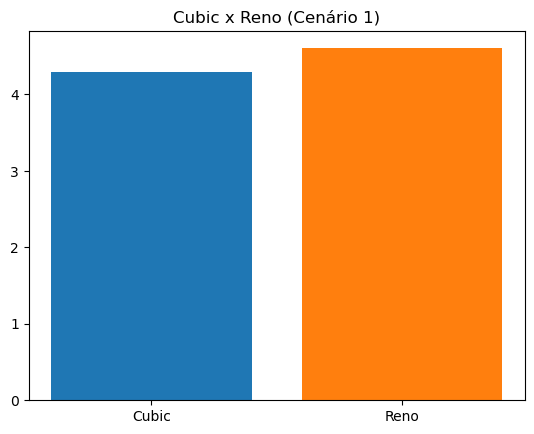

Cenário 2 (banda=10M, BER=100000, delay=100000): Taxa média Cubic: 1.22 Mbps, Taxa média Reno: 1.16 Mbps


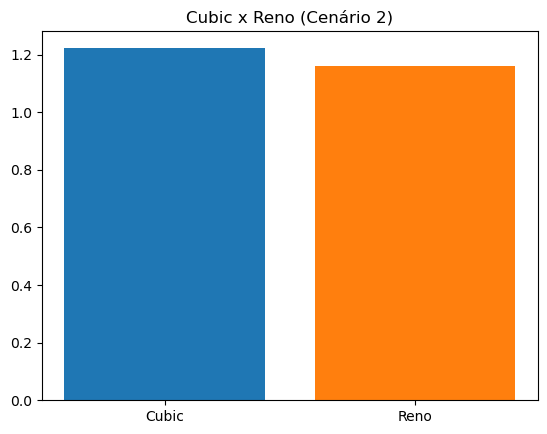

Cenário 3 (banda=10M, BER=1000000, delay=10000): Taxa média Cubic: 75.8 Mbps, Taxa média Reno: 53.6 Mbps


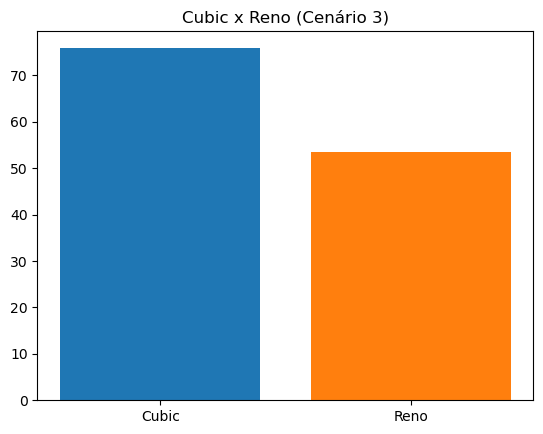

Cenário 4 (banda=10M, BER=1000000, delay=100000): Taxa média Cubic: 15.2 Mbps, Taxa média Reno: 13.5 Mbps


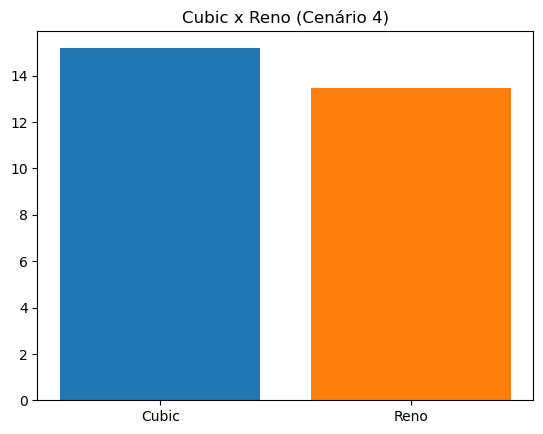

Cenário 5 (banda=500M, BER=100000, delay=10000): Taxa média Cubic: 5.08 Mbps, Taxa média Reno: 4.31 Mbps


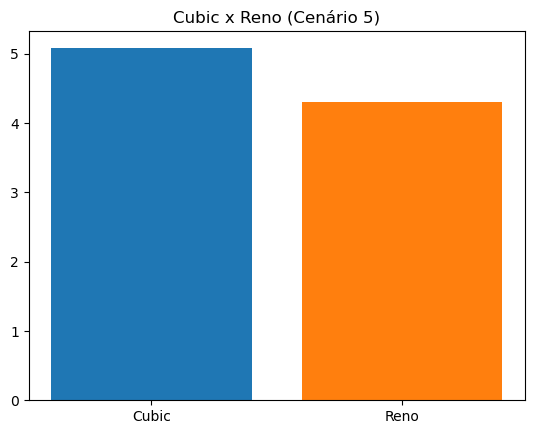

Cenário 6 (banda=500M, BER=100000, delay=100000): Taxa média Cubic: 2.07 Mbps, Taxa média Reno: 1.07 Mbps


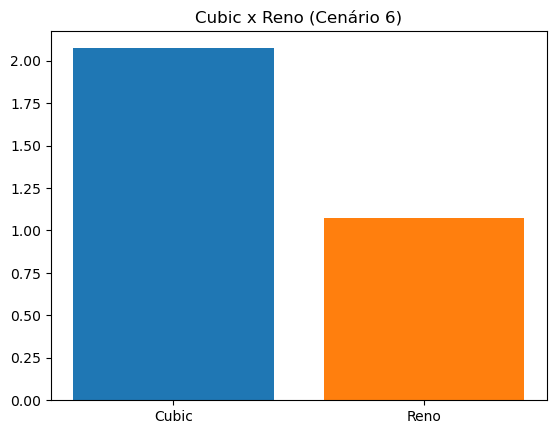

Cenário 7 (banda=500M, BER=1000000, delay=10000): Taxa média Cubic: 49.7 Mbps, Taxa média Reno: 79.1 Mbps


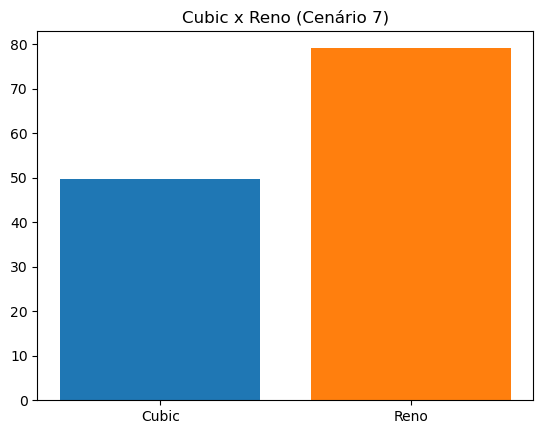

Cenário 8 (banda=500M, BER=1000000, delay=100000): Taxa média Cubic: 12.6 Mbps, Taxa média Reno: 5.51 Mbps


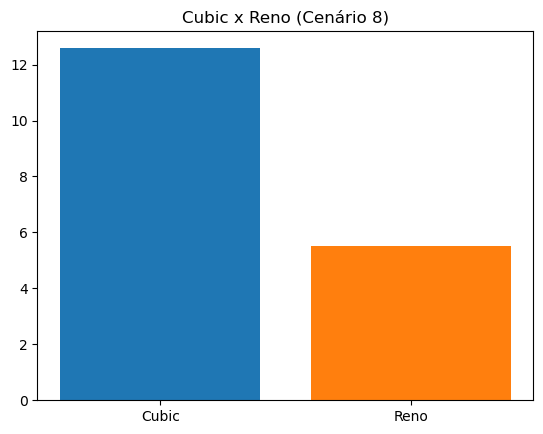

In [80]:
BANDA_UDP = ['10M','500M']
BER = [100000,1000000]
E2E_DELAY = [10000,100000]
cenario = 0
for banda in BANDA_UDP:
    for ber in BER:
        for delay in E2E_DELAY:
            cenario += 1
            dados_cenario = dados[(dados['BANDA UDP'] == banda) & (dados['BER'] == ber) & (dados['DELAY'] == delay)]
            dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
            dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
            cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
            reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
            print(f"Cenário {cenario} (banda={banda}, BER={ber}, delay={delay}): Taxa média Cubic: {cubic_taxa_media:.3} Mbps, Taxa média Reno: {reno_taxa_media:.3} Mbps")
            plt.bar("Cubic",cubic_taxa_media)
            plt.bar("Reno",reno_taxa_media)
            plt.title('Cubic x Reno (Cenário '+str(cenario)+')')
            plt.show()